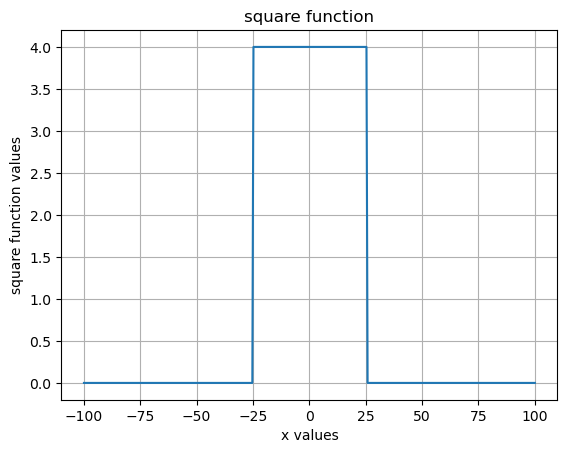

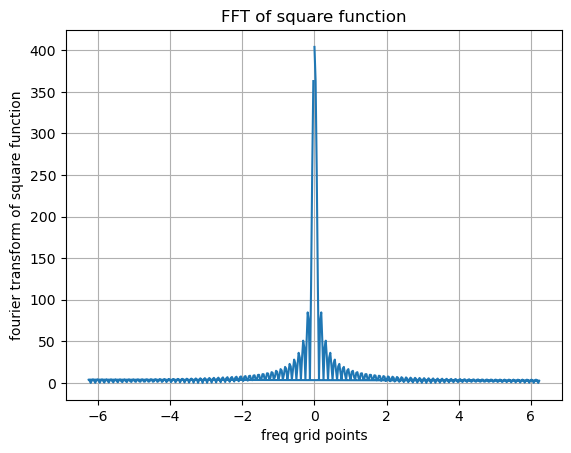

In [2]:
#Q1 A part

import numpy as np
import matplotlib.pyplot as plt

######## making of square function ###########
xmin = 100
xmax = 100
Nx = 400  # no. of grid points
x = np.linspace(-xmin,xmax, Nx)   # real grid points
a = 4


def sq_func(x,a):
    y = np.zeros_like(x)
    for i in range(150, 251):
        y[i] += a
    return y

y = sq_func(x,a)

# plotting
plt.plot(x,y)
plt.title("square function")
plt.xlabel("x values")
plt.ylabel('square function values')
plt.grid()
plt.show()



########## FFT of square function #############
dx = x[1] - x[0]
k = np.fft.fftfreq(Nx,d=dx)*2*np.pi  # freq grid points


y_k = np.fft.fft(y)

plt.plot(k,np.abs(y_k))
plt.xlabel('freq grid points')
plt.ylabel('fourier transform of square function')
plt.title('FFT of square function')
plt.grid()
plt.show()

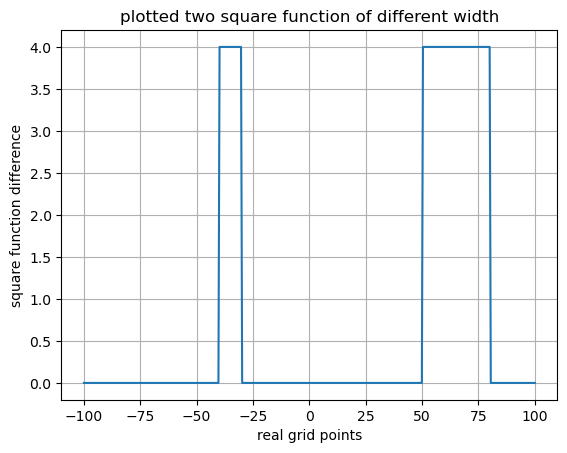

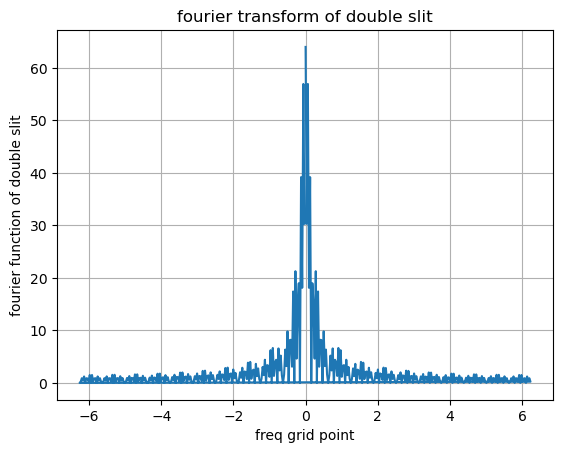

In [3]:
#Q1  B part

def sq_func_diff(x,a):
    y = np.zeros_like(x)
    for i in range(120,140):
        y[i] += a
    for i in range(300,360):
        y[i] += a
    return y

y = sq_func_diff(x,a)

plt.plot(x,y)
plt.xlabel('real grid points')
plt.ylabel('square function difference')
plt.title('plotted two square function of different width')
plt.grid()
plt.show()



#### FFT
dx= x[1] - x[0]
k = np.fft.fftfreq(len(x),d=dx )*2*np.pi  #freq grid point
y_k = np.fft.fft(y)*dx / np.sqrt(2 * np.pi)

#plotting
plt.plot(k,np.abs(y_k))
plt.xlabel('freq grid point')
plt.ylabel('fourier function of double slit')
plt.title('fourier transform of double slit')
plt.grid()
plt.show()

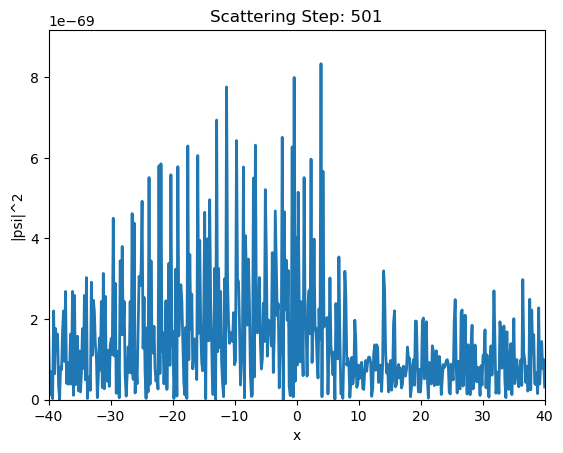

In [4]:
#Q2  A part

#substitutions
xmin = 40
xmax = 40
N = 500            #total no. of grid points
sigma = 0.004
mean = -5
h =1               # reduced planck const 
m =1               # mass 
dt = 0.01           # time step
v0 = 40            # depth of postential well
left = 5           # for potential well
right = 7          # for potential well
iteration = 500    # no of iteration to evaluate my 
plot_every=1
k0 = 3  #wave number p=hk0

#real grid
x = np.linspace(-xmin,+xmax, N) # making real grid points
dx = x[1]-x[0]  #real axis step


#freq grid
k = np.fft.fftfreq(N, d= dx)*2*np.pi # freq grid points


# intial condition
def gaussian_wave_packet(x,x0,sigma,k0):  ##gaussian wave packet
    y = 1/(np.sqrt(sigma*(np.sqrt(2*np.pi))))*np.exp(-((x - x0)**2)/(2*(sigma**2)))*np.exp(1j*k0*x)   #np.exp(1j*k0*x), for giving initial momentum
    return y

psi = gaussian_wave_packet(x,mean, sigma,k0)



# defining potential function 
def potential_well(x, left, right):
    v = np.zeros(len(x))
    for i in range(len(x)):
        if x[i] < left:
            v[i] += 0
        elif x[i] >right:
            v[i] += 0
        else:
            v[i] += v0
    return v
        
V = potential_well(x, left, right)
    


# evaluation
def second_order_split(psi,dt,h,V):   ##Second-Order Splitting (Symmetric - Strang Splitting)

    # going in freq space -> T operator act -> back to real space -> 
    # V operator act -> jump into freq space -> T operator act -> back to real space
    
    psi_k = np.fft.fft(psi)
    T = (k**2)*(h**2)/(2*m)   # T = P^2 / 2m, P = kh
    psi_k *= np.exp(-1j*T*dt/(2*h))
    psi = np.fft.ifft(psi_k)
    
    psi *= np.exp(-1j*V*dt/h) 
    
    psi_k = np.fft.fft(psi)
    psi_k *= np.exp(-1j*T*dt/(2*h))
    psi = np.fft.ifft(psi_k)
    
    return psi



snapshot = []
snapshot.append(psi.copy())    # to store initial psi

#iteration 
for i in range(0, iteration +1):
    psi = second_order_split(psi,dt,h,V)
    
    if i % plot_every ==0:
        snapshot.append(psi.copy())

# plotting
fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(snapshot[0])**2, lw=2)
ax.set_xlim(-xmin, xmax)
ax.set_ylim(0, 1.1 * np.max(np.abs(snapshot[0])**2))
ax.set_xlabel("x")
ax.set_ylabel("|psi|^2")


def update(frames):
    # frame is an index into snapshots
    psi_current = snapshot[frames]
    prob_density = np.abs(psi_current)**2
    line.set_ydata(prob_density)
    ax.set_ylim(0, 1.1 * np.max(prob_density))
    ax.set_title(f"Scattering Step: {frames*plot_every}")
    return line,

from matplotlib.animation import FuncAnimation

ani = FuncAnimation(fig, update, frames=len(snapshot), blit=False,interval=100)


# Save as GIF (requires "pillow" or "imagemagick" installed)
ani.save("worksheet09_Q2(A)_wavefunction_scattering.gif", writer="pillow", fps=20)
plt.show()

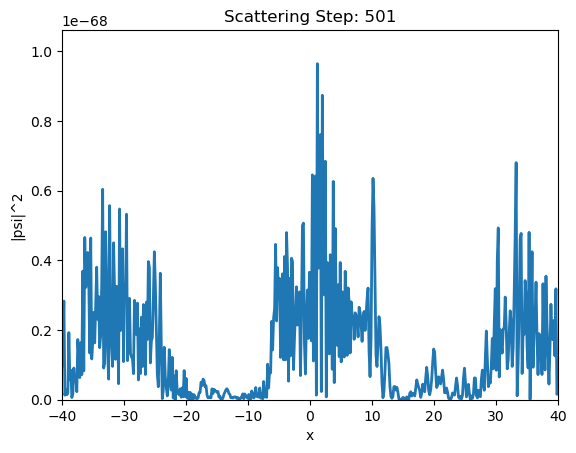

In [5]:
#Q2  B part , V(x) = 0.1 × x2


# defining potential function 
def new_potential(x):
    V = 0.1 * x**2
    return V
    
new_V = new_potential(x)




snapshot = []
snapshot.append(psi.copy())    # to store initial psi

#iteration 
for i in range(0, iteration +1):
    psi = second_order_split(psi,dt,h,new_V)
    
    if i % plot_every ==0:
        snapshot.append(psi.copy())

# plotting
fig, ax = plt.subplots()
line, = ax.plot(x, np.abs(snapshot[0])**2, lw=2)
ax.set_xlim(-xmin, xmax)
ax.set_ylim(0, 1.1 * np.max(np.abs(snapshot[0])**2))
ax.set_xlabel("x")
ax.set_ylabel("|psi|^2")


def update(frames):
    # frame is an index into snapshots
    psi_current = snapshot[frames]
    prob_density = np.abs(psi_current)**2
    line.set_ydata(prob_density)
    ax.set_ylim(0, 1.1 * np.max(prob_density))
    ax.set_title(f"Scattering Step: {frames*plot_every}")
    return line,

from matplotlib.animation import FuncAnimation

ani = FuncAnimation(fig, update, frames=len(snapshot), blit=False,interval=100)


# Save as GIF (requires "pillow" or "imagemagick" installed)
ani.save("worksheet09_Q2(B)_wavefunction_scattering.gif", writer="pillow", fps=20)
plt.show()